# Dimensionality Reduction Using PCA and t-SNE

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import time, psutil

In [21]:
start_time = time.time()

## Load the Dataset

In [22]:
wine = load_wine(as_frame=True)
df = wine.frame
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [23]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

### Display the first 5 rows and describe the dataset

In [24]:
df.iloc[:, :5]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium
0,14.23,1.71,2.43,15.6,127.0
1,13.20,1.78,2.14,11.2,100.0
2,13.16,2.36,2.67,18.6,101.0
3,14.37,1.95,2.50,16.8,113.0
4,13.24,2.59,2.87,21.0,118.0
...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0
174,13.40,3.91,2.48,23.0,102.0
175,13.27,4.28,2.26,20.0,120.0
176,13.17,2.59,2.37,20.0,120.0


### Split the dataset into features (X) and target labels (y)

In [25]:
X = df.iloc[:, :-1]
y =df.iloc[:, -1]

## Data Standardization 

In [26]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Principal Component Analysis (PCA)  

In [27]:
pca = PCA(n_components=2) 
principal_components = pca.fit_transform(X)

In [28]:
pca_df = pd.DataFrame(data = np.vstack((principal_components.T, y)).T, columns =("PCA1", "PCA2", "label"))
pca_df

,PCA1,PCA2,label
0,318.562979,21.492131,0.0
1,303.097420,-5.364718,0.0
2,438.061133,-6.537309,0.0
3,733.240139,0.192729,0.0
4,-11.571428,18.489995,0.0
...,...,...,...
173,-6.980211,-4.541137,2.0
174,3.131605,2.335191,2.0
175,88.458074,18.776285,2.0
176,93.456242,18.670819,2.0


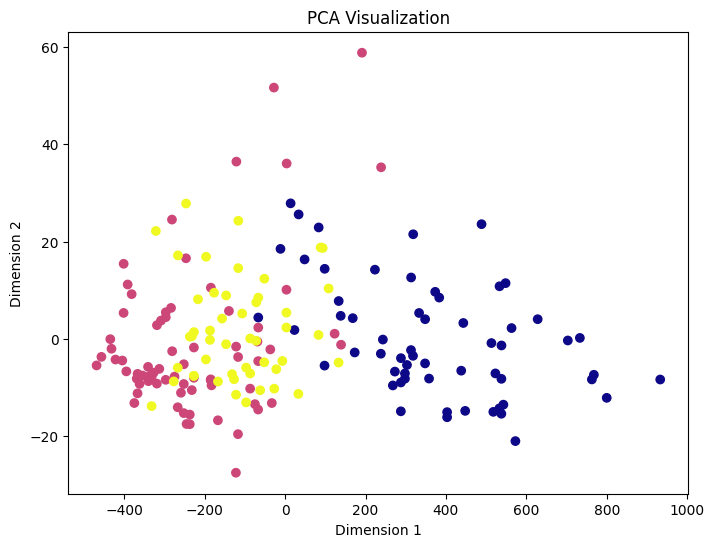

In [29]:
plt.figure(figsize=(8, 6))

plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=pca_df['label'], cmap='plasma')

plt.title('PCA Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## t-SNE Visualization

In [30]:
model = TSNE( n_components=2, random_state=0)
tsne_data = model.fit_transform(X)

In [31]:
np.shape(tsne_data)

(178, 2)

In [32]:
np.shape(principal_components)

(178, 2)

In [33]:
tsne_df = pd.DataFrame(data = np.vstack((tsne_data.T, y)).T, columns =("Dim1", "Dim2", "label"))
tsne_df

,Dim1,Dim2,label
0,10.776262,-0.487612,0.0
1,10.432003,-0.650546,0.0
2,12.985907,-0.837710,0.0
3,15.823071,-0.589132,0.0
4,2.084576,-0.622652,0.0
...,...,...,...
173,2.049382,-1.025591,2.0
174,2.485284,-0.999561,2.0
175,5.089700,-0.840400,2.0
176,5.249944,-0.763763,2.0


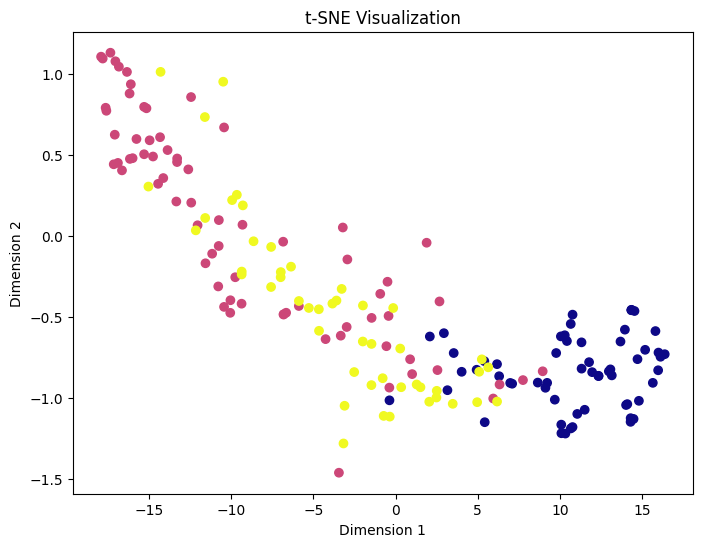

In [34]:
plt.figure(figsize=(8, 6))

plt.scatter(tsne_df.iloc[:, 0], tsne_df.iloc[:, 1], c=tsne_df['label'], cmap='plasma')

plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

## K-Means Clustering

In [35]:
km = KMeans(n_clusters=2)
km.fit(X)
labels = km.labels_
df['Cluster'] = labels
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,Cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,0


In [36]:
km=KMeans(n_clusters=2)
km.fit(pca_df[['PCA1', 'PCA2']])
labels_pca = km.labels_
pca_df['Cluster'] = labels_pca
pca_df.head()

,PCA1,PCA2,label,Cluster
0,318.562979,21.492131,0.0,1
1,303.097420,-5.364718,0.0,1
2,438.061133,-6.537309,0.0,1
3,733.240139,0.192729,0.0,1
4,-11.571428,18.489995,0.0,0


In [37]:
km=KMeans(n_clusters=2)
km.fit(tsne_df[['Dim1', 'Dim2']])
labels_tsne = km.labels_
tsne_df['Cluster'] = labels_tsne
tsne_df.head()

,Dim1,Dim2,label,Cluster
0,10.776262,-0.487612,0.0,1
1,10.432003,-0.650546,0.0,1
2,12.985907,-0.837710,0.0,1
3,15.823071,-0.589132,0.0,1
4,2.084576,-0.622652,0.0,1


In [38]:
print("Silhouette Scores")
print("Original Dataset:",silhouette_score(X, labels))
print("Principal Component:",silhouette_score(pca_df[['PCA1', 'PCA2']], labels_pca))
print("t-SNE:",silhouette_score(tsne_df[['Dim1', 'Dim2']], labels_tsne))

Silhouette Scores
Original Dataset: 0.6568536504294317
Principal Component: 0.6572176888364498
t-SNE: 0.6167289247124942


In [39]:
memory_info = psutil.virtual_memory()
used_memory = memory_info.used / (1024 ** 2)
end_time = time.time()
runtime = end_time - start_time

print(f"Current Memory Usage: {used_memory} MB")
print(f"Runtime for Notebook: {runtime:.4f} seconds")

Current Memory Usage: 7543.796875 MB
Runtime for Notebook: 2.1810 seconds
